
# Handwritten Character Recognition

Building a Machine Learning model to recognize handwritten characters using the A_Z Handwritten Characters dataset.


## Importing Libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


## Data Loading and Exploration

Dataset shape: (372450, 785)


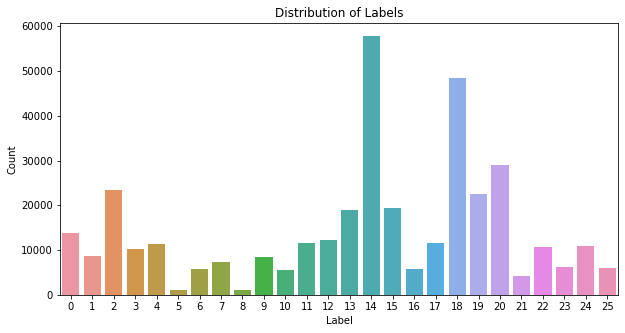

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('E:/FDM new downloads/A_Z Handwritten Data.csv')

# Display the shape of the dataset
print(f"Dataset shape: {data.shape}")

# Separate features and labels
X = data.drop('0', axis=1).values  # '0' is the column name for labels
y = data['0'].values  # '0' is the column name for labels

# Visualize the distribution of labels
plt.figure(figsize=(10,5))
sns.countplot(x=y)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


## Data Preprocessing

In [7]:

# Reshape the data to 28x28 pixels and add the channel dimension
X = X.reshape(-1, 28, 28, 1)

# Normalize the pixel values
X = X.astype('float32') / 255.0

# One-hot encode the labels
y_cat = to_categorical(y, num_classes=26)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")


Training data shape: (297960, 28, 28, 1)
Testing data shape: (74490, 28, 28, 1)
Training labels shape: (297960, 26)
Testing labels shape: (74490, 26)


## Model Building and Training

In [8]:

# Build the CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(26, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model architecture
model.summary()

# Train the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

## Model Evaluation

Test Accuracy: 0.9915
Test Loss: 0.0329
2328/2328 [==============================] - 16s 7ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2806
           1       0.99      0.99      0.99      1673
           2       0.99      0.99      0.99      4742
           3       0.98      0.96      0.97      2044
           4       0.99      0.99      0.99      2214
           5       0.99      0.99      0.99       231
           6       0.98      0.98      0.98      1183
           7       0.99      0.97      0.98      1466
           8       0.99      0.98      0.99       237
           9       0.99      0.99      0.99      1668
          10       0.98      0.99      0.98      1132
          11       0.99      0.99      0.99      2319
          12       0.99      1.00      0.99      2487
          13       0.99      0.99      0.99      3756
          14       0.99      1.00      0.99     11629
          15  

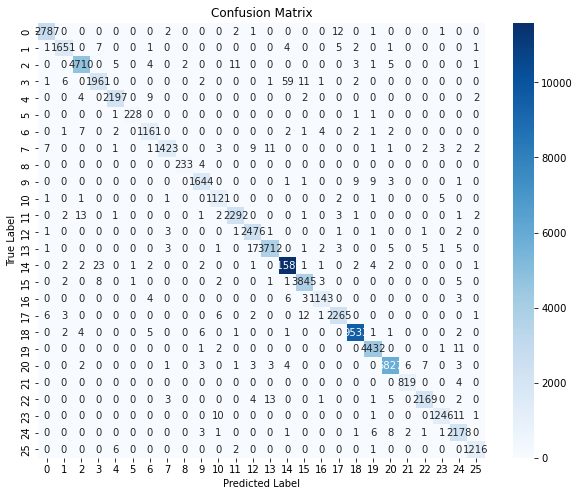

In [9]:

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Predict the labels for test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded y_test back to labels
y_test_labels = np.argmax(y_test, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_test_labels, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_test_labels, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Prediction on New Data

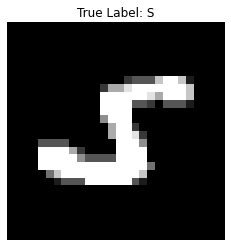

1/1 [==============================] - 0s 22ms/step
Predicted Label: S


In [19]:

# Example: Predicting a single image from the test set
import random

# Select a random test image
index = random.randint(0, X_test.shape[0]-1)
sample_image = X_test[index]
sample_label = y_test_labels[index]

# Display the image
plt.imshow(sample_image.reshape(28,28), cmap='gray')
plt.title(f"True Label: {chr(sample_label + 65)}")  # Convert label to corresponding alphabet
plt.axis('off')
plt.show()

# Prepare the image for prediction
sample_image_expanded = np.expand_dims(sample_image, axis=0)

# Predict the label
prediction = model.predict(sample_image_expanded)
predicted_label = np.argmax(prediction, axis=1)[0]
print(f"Predicted Label: {chr(predicted_label + 65)}")  # Convert label to corresponding alphabet


## Visualization of Training History

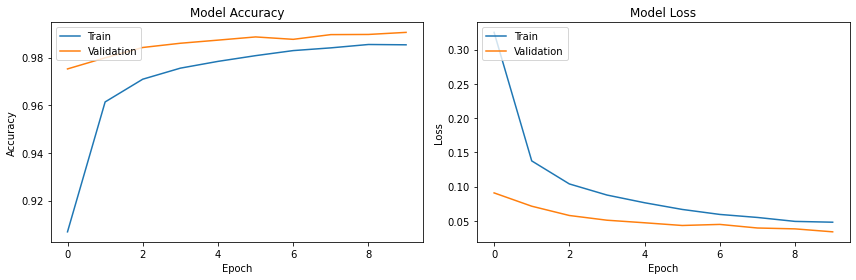

In [11]:

# Plot training & validation accuracy values
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()
